In [3]:
import splitfolders
splitfolders.ratio("./ct-ori-dataset", output="dataset", seed=1337, ratio=(.8, .1, .1), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  4.73 files/s]
Copying files: 104 files [00:00, 399.62 files/s]
Copying files: 239 files [00:00, 728.97 files/s]
Copying files: 372 files [00:00, 885.99 files/s]
Copying files: 505 files [00:00, 990.57 files/s]
Copying files: 614 files [00:00, 1011.83 files/s]
Copying files: 721 files [00:00, 1019.23 files/s]
Copying files: 827 files [00:00, 999.40 files/s] 
Copying files: 930 files [00:01, 946.23 files/s]
Copying files: 1037 files [00:01, 950.81 files/s]
Copying files: 1161 files [00:01, 1001.47 files/s]
Copying files: 1303 files [00:01, 1117.81 files/s]
Copying files: 1460 files [00:01, 1244.56 files/s]
Copying files: 1593 files [00:01, 1267.31 files/s]
Copying files: 1749 files [00:01, 1350.36 files/s]
Copying files: 1919 files [00:01, 1451.43 files/s]
Copying files: 2067 files [00:01, 1458.84 files/s]
Copying files: 2216 files [00:02, 1467.48 files/s]
Copying files: 2364 files [00:02, 1413.25 files/s]
Copying

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
# Import all the libraries 
import os
import shutil
from PIL import Image, ImageOps  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
pio.templates.default = 'plotly_white'
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Concatenate, Flatten, MaxPooling2D, Conv2D
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
channels=3
batch_size=25
test_batch_size=32 
test_steps=1
train_path = './dataset/train'
test_path = './dataset/test'
val_path = './dataset/val'
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):    
    return img  # EfficientNet expects pixelsin range 0 to 255 so no scaling is required
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
train_generator=trgen.flow_from_directory( directory=train_path , target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_generator=tvgen.flow_from_directory( directory=test_path, target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)

valid_generator=tvgen.flow_from_directory( directory=val_path, target_size=(224,224), class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_generator.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_generator.labels)/batch_size))

test batch size:  32   test steps:  1
Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [3]:
from keras.applications import VGG16

base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3), classes = 38)

In [4]:
model= Sequential()
model.add(base_model) 
model.add(Flatten())

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(4,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [7]:
from keras.optimizers.schedules.learning_rate_schedule import ExponentialDecay

batch_size= 1218
epochs=15
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
initial_learning_rate = 0.1
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

adam = Adam(learning_rate=lr_schedule)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,epochs = 5
          , validation_data = valid_generator, verbose = 1)

Epoch 1/5
399/399 [==============================] - 3907s 10s/step - loss: 1.0582 - accuracy: 0.5789 - val_loss: 0.8452 - val_accuracy: 0.6916
Epoch 2/5
399/399 [==============================] - 3382s 8s/step - loss: 0.4638 - accuracy: 0.8238 - val_loss: 0.2166 - val_accuracy: 0.9155
Epoch 3/5
399/399 [==============================] - 3407s 9s/step - loss: 0.1672 - accuracy: 0.9412 - val_loss: 0.0708 - val_accuracy: 0.9694
Epoch 4/5
399/399 [==============================] - 3374s 8s/step - loss: 0.0642 - accuracy: 0.9775 - val_loss: 0.0222 - val_accuracy: 0.9911
Epoch 5/5
399/399 [==============================] - 3373s 8s/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0572 - val_accuracy: 0.9871


In [9]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names     
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)         
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):                
                split1=os.path.split(error_list[i])                
                split2=os.path.split(split1[0])                
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    if len(classes)<= 40:
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

In [10]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

40/40 [==============================] - 106s 3s/step
          Filename                Predicted Class                True Class           Probability   

 Normal/Normal- (1432).jpg             Tumor                       Normal               0.7040

 Normal/Normal- (1847).jpg             Stone                       Normal               0.4705

 Normal/Normal- (2128).jpg             Tumor                       Normal               0.5666

 Normal/Normal- (4661).jpg             Tumor                       Normal               0.4712

  Stone/Stone- (1331).jpg               Cyst                       Stone                0.7619

  Stone/Stone- (1339).jpg               Cyst                       Stone                0.6909

   Stone/Stone- (241).jpg               Cyst                       Stone                0.7392

   Stone/Stone- (247).jpg               Cyst                       Stone                0.9528

   Stone/Stone- (40).jpg                Cyst                       Stone    

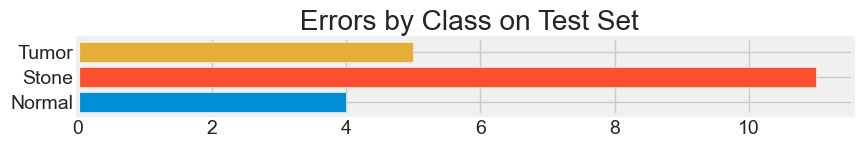

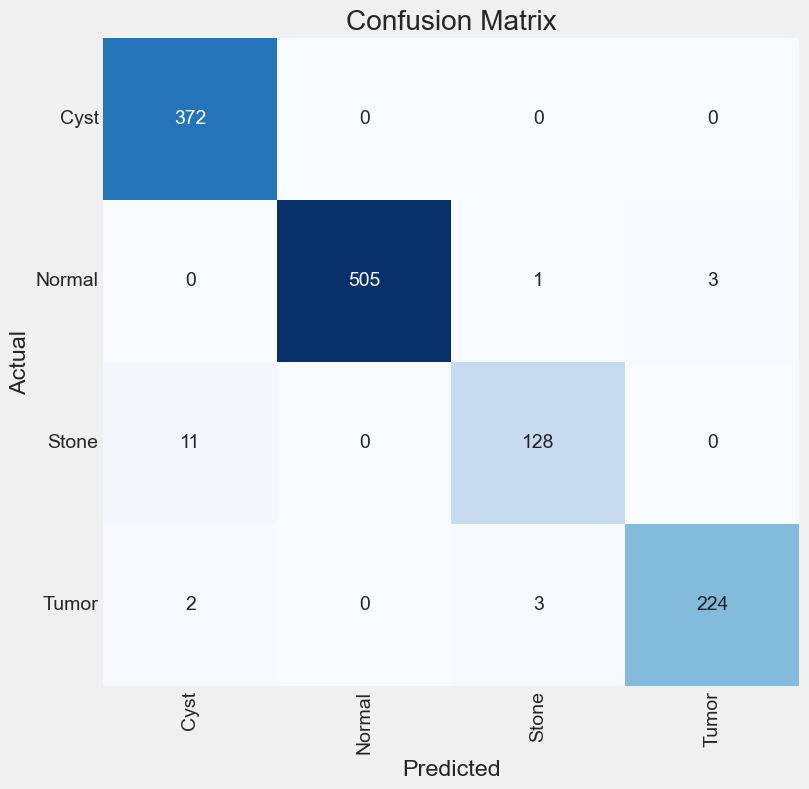

Classification Report:
----------------------
               precision    recall  f1-score   support

        Cyst       0.97      1.00      0.98       372
      Normal       1.00      0.99      1.00       509
       Stone       0.97      0.92      0.94       139
       Tumor       0.99      0.98      0.98       229

    accuracy                           0.98      1249
   macro avg       0.98      0.97      0.98      1249
weighted avg       0.98      0.98      0.98      1249


In [11]:
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
p = model.predict(test_generator)
print_info( test_generator, p, 10, r'./', 'kidney' )

In [12]:
model.evaluate(test_generator)

40/40 [==============================] - 107s 3s/step - loss: 0.0509 - accuracy: 0.9840


[0.050857655704021454, 0.9839872121810913]

In [13]:
model.save("vgg16.h5")

In [14]:
import shutil 
shutil.rmtree('./dataset')

In [15]:
history.params
history.history.keys()
type(history.history['loss'])
len(history.history['loss'])

5

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

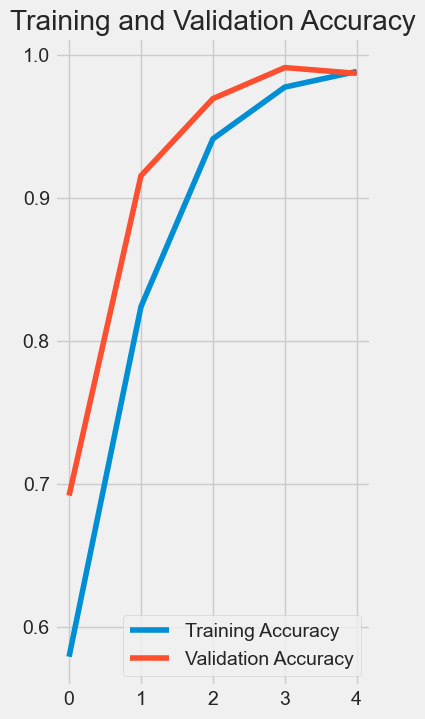

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

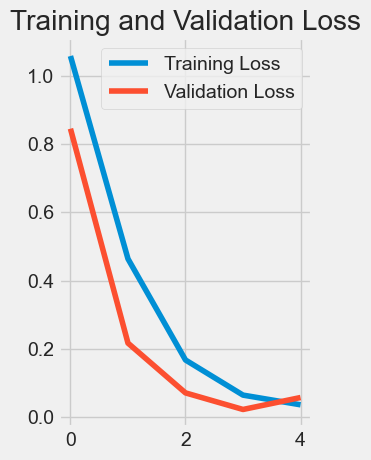

In [19]:
plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Assuming 'classes' is your list of class labels
classes = ["Cyst", "Normal", "Stone", "Tumor"]

# Create a label encoder
label_maker = LabelEncoder()
label_maker.fit(classes)

# Save the label maker to a file
with open('label_maker.pkl', 'wb') as f:
    pickle.dump(label_maker, f)